In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [87]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [88]:
df.shape

(32581, 12)

In [89]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

* There are 895 null values in person_emp_length column
* There are 3116 null values in loan_int_rate column

### Replaceing null values with median of loan_int_rate

In [90]:
print(df['loan_int_rate'].mean())
print(df['loan_int_rate'].median())

11.01169489224439
10.99


In [91]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [92]:
df['loan_int_rate'].isnull().sum()

0

### Replaceing null values with median of person_emp_length column

In [93]:
print(df['person_emp_length'].mean())
print(df['person_emp_length'].median())

4.789686296787225
4.0


In [94]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].median())

In [95]:
df['person_emp_length'].isnull().sum()

0

In [96]:
# Null values are treated
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [97]:
# finding duplicate rows in dataframe
df.duplicated(keep='first').sum()

165

In [98]:
# droping duplicates
df.drop_duplicates(keep='first',inplace=True)

In [99]:
df.duplicated(keep='first').sum()

0

# Univariate analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [16]:
df_obj=df.select_dtypes('object')

In [18]:
df_int=df.select_dtypes(include=('int64','float64'))

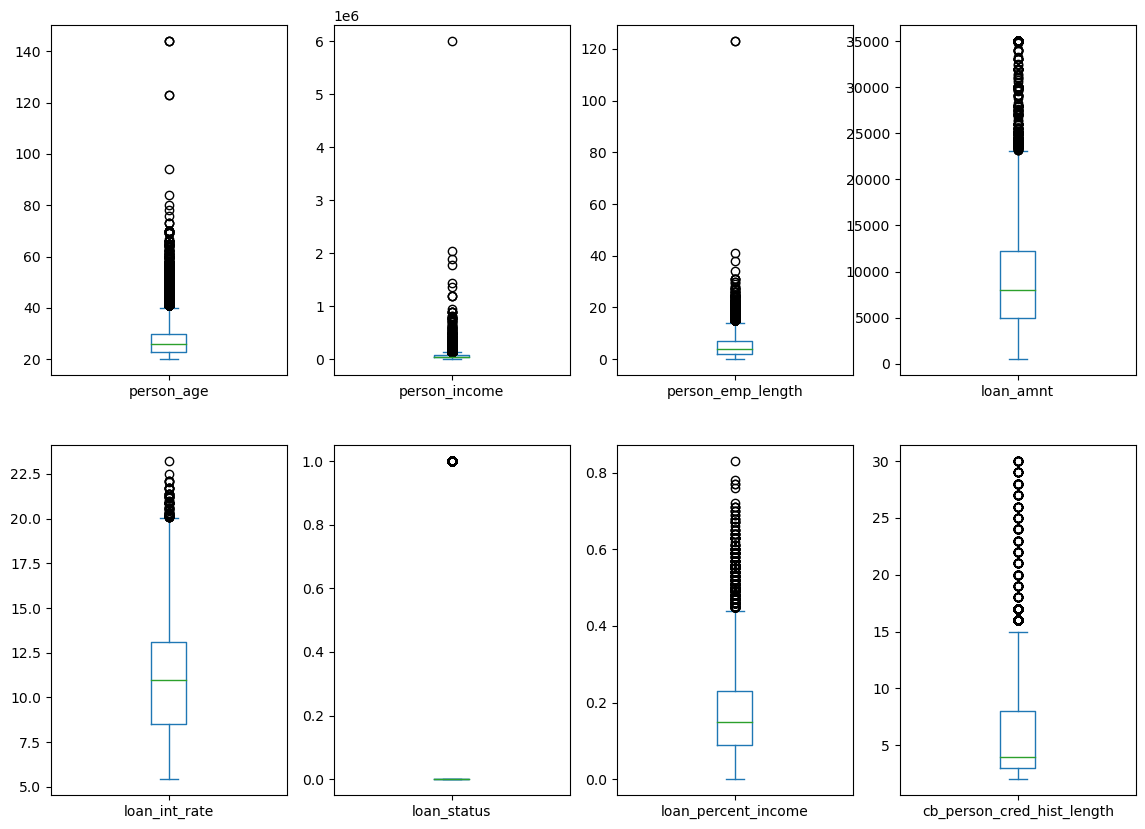

In [19]:
Num=df_int.plot(kind='box',subplots=True,layout=(2,4),figsize=(14,10))

#### Non_viz on person_home_ownership
* Mode

In [36]:
df['person_home_ownership'].mode()

0    RENT
Name: person_home_ownership, dtype: object

#### Viz on person_home_ownership

<AxesSubplot:>

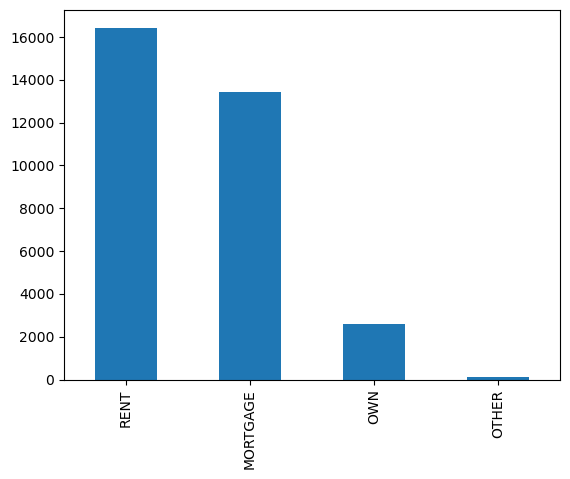

In [37]:
df['person_home_ownership'].value_counts().plot(kind='bar')

* Most of the people are from rent house to person_home_ownership


#### Non_viz on loan_intent
* Mode

In [38]:
df['loan_intent'].mode()

0    EDUCATION
Name: loan_intent, dtype: object

#### Viz on loan_intent

<AxesSubplot:>

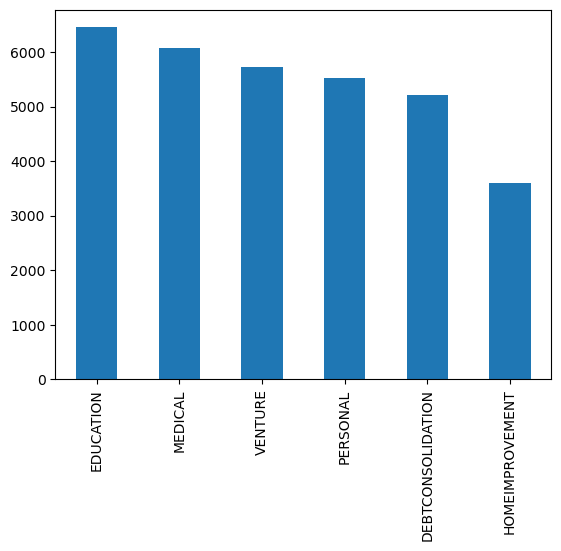

In [39]:
df['loan_intent'].value_counts().plot(kind='bar')

* In the loan_intent column most repeating is education
* The most of the people are taking loan on education

#### Non_viz on loan_grade
* Mode

In [40]:
df['loan_grade'].mode()

0    A
Name: loan_grade, dtype: object

#### Viz on loan_grade

<AxesSubplot:>

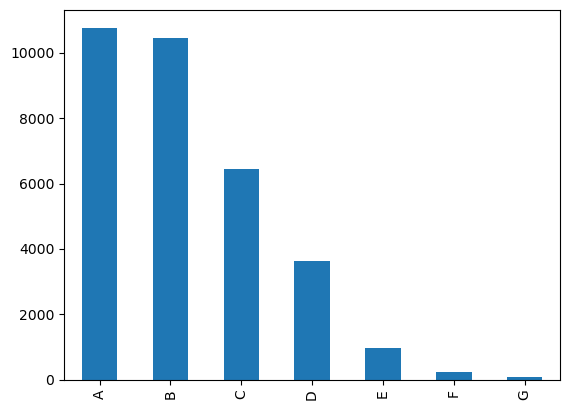

In [41]:
df['loan_grade'].value_counts().plot(kind='bar')

* In the grade column most reapeating grade is A
* The monthly payment more than 10000

#### Non_viz on cb_person_default_on_file
* Mode

In [42]:
df['cb_person_default_on_file'].mode()

0    N
Name: cb_person_default_on_file, dtype: object

#### Viz on cb_person_default_on_file

<AxesSubplot:>

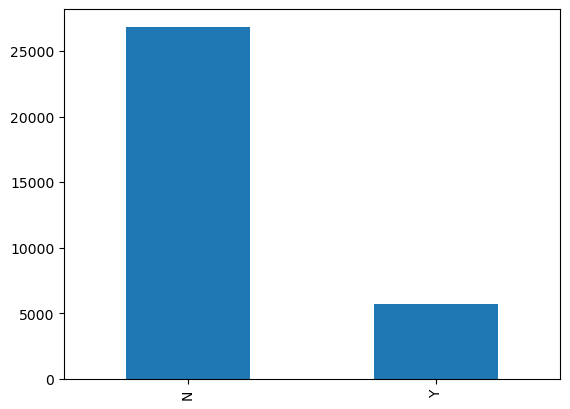

In [43]:
df['cb_person_default_on_file'].value_counts().plot(kind='bar')

* From the cb_person_default_on_file column most reapeating is N
* The majority of people who has loan more than 25000 has defalt oh file 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Non_viz on age
* Min,Max,Mean,median,std

In [18]:
print(df['person_age'].min())
print(df['person_age'].max())
print(df['person_age'].mean())
print(df['person_age'].median())
print(df['person_age'].std())

20
144
27.73459992019889
26.0
6.3480784192252475


* The mean and median are near maybe there are few or no outliers in person_age

### Viz on Person_age

AxesSubplot(0.125,0.11;0.775x0.77)


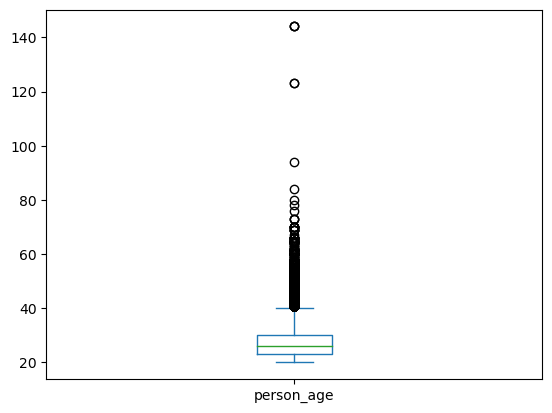

In [17]:
print(df['person_age'].plot(kind='box'))

* THe above boxplot shows that there are outliers in the person_age column

<AxesSubplot:ylabel='Density'>

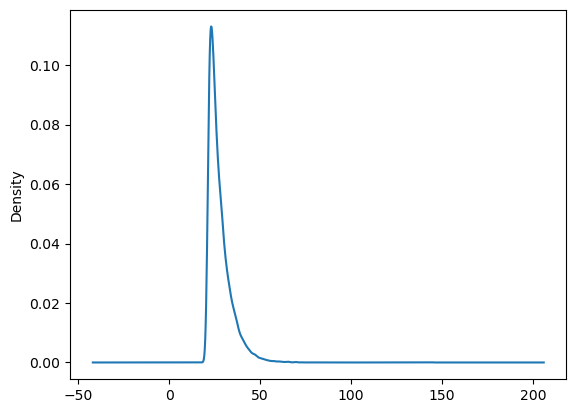

In [19]:
df['person_age'].plot(kind='kde')

* The kde plot shows there are outliers in right side of mean

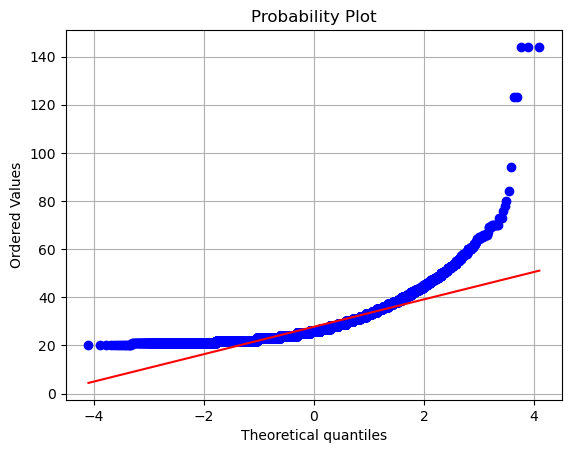

In [21]:
stats.probplot(df['person_age'],dist='norm',plot=plt)
plt.grid()

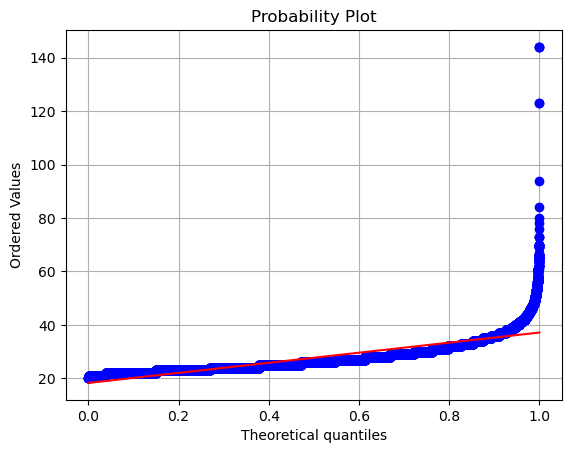

In [22]:
stats.probplot(df['person_age'],dist='uniform',plot=plt)
plt.grid()

In [23]:
# Applying boxcox
x_y,l=stats.boxcox(df['person_age'])
print(l)

-2.413496453615275


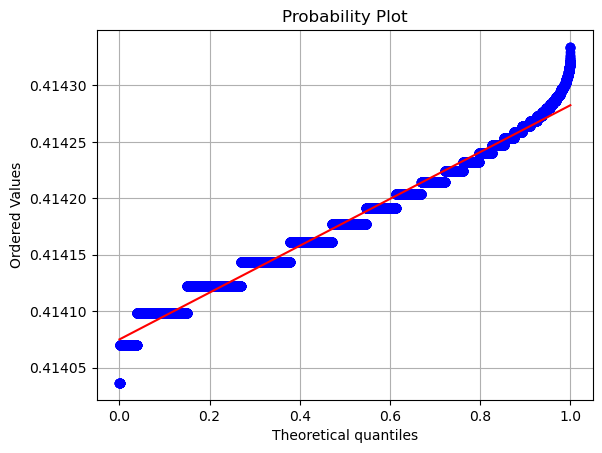

In [25]:
stats.probplot(x_y,dist='uniform',plot=plt)
plt.grid()

* The most number of data points are lying on the line
* It maybe the uniform distribution

### Non_viz on person_income
* min,max,mean,median,std

In [26]:
print(df['person_income'].min())
print(df['person_income'].max())
print(df['person_income'].mean())
print(df['person_income'].median())
print(df['person_income'].std())

4000
6000000
66074.84846996715
55000.0
61983.119168159064


* The mean and median are far maybe there are few or no outliers in person_income

### Viz on person_income

<AxesSubplot:>

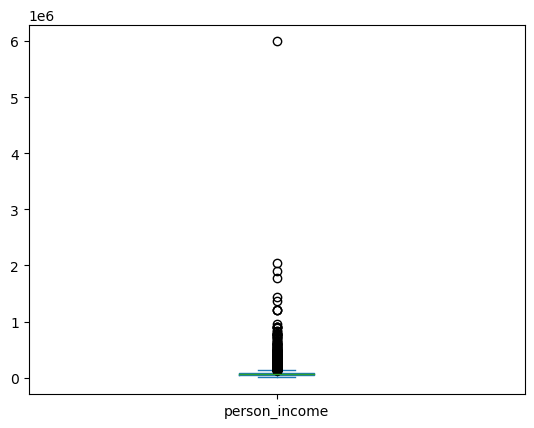

In [27]:
df['person_income'].plot(kind='box')

* There are few outliers in person_income column

<AxesSubplot:ylabel='Density'>

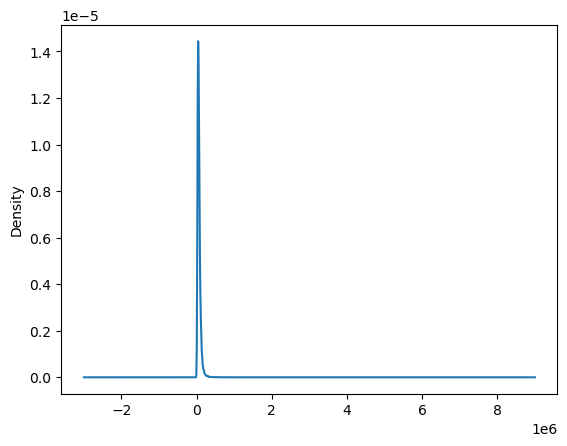

In [28]:
df['person_income'].plot(kind='kde')

* The kde plot is right skweed 
* The outliers are present in right side of plot

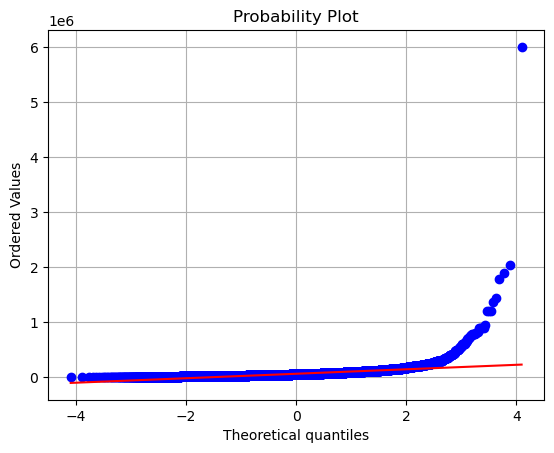

In [29]:
stats.probplot(df['person_income'],dist='norm',plot=plt)
plt.grid()

In [14]:
# Applying boxcox
x_v,l=stats.boxcox(df['person_income'])
print(l)

-0.06322518556191643


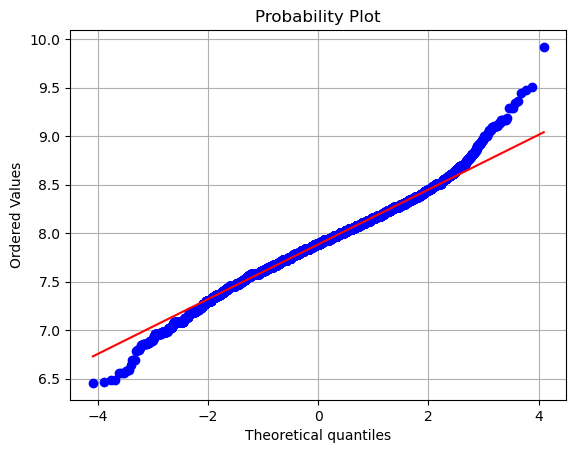

In [29]:
stats.probplot(x_v,dist='norm',plot=plt)
plt.grid()

* The max of data points are lied on the line 
* It maybe normal distribution

#### Non_viz on person_emp_length
* Min,max,mean,median,std

In [16]:
print(df['person_emp_length'].min())
print(df['person_emp_length'].max())
print(df['person_emp_length'].mean())
print(df['person_emp_length'].median())
print(df['person_emp_length'].std())

0.0
123.0
4.767993615911114
4.0
4.087371678206524


* The mean and median are near maybe there are few or now outliers

#### Viz on person_emp_length

<AxesSubplot:>

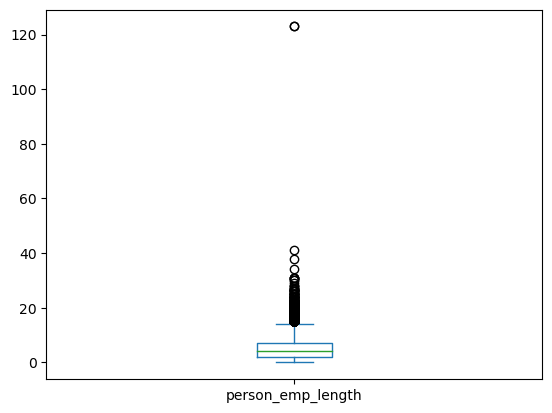

In [17]:
df['person_emp_length'].plot(kind='box')

* There are few outliers in this person_emp_length column

<AxesSubplot:ylabel='Density'>

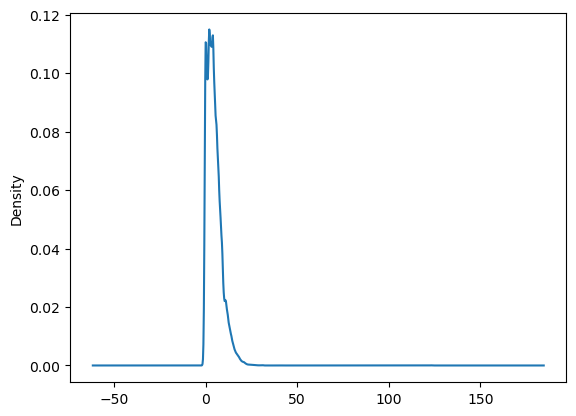

In [18]:
df['person_emp_length'].plot(kind='kde')

* The outliers are present in right side of the plot

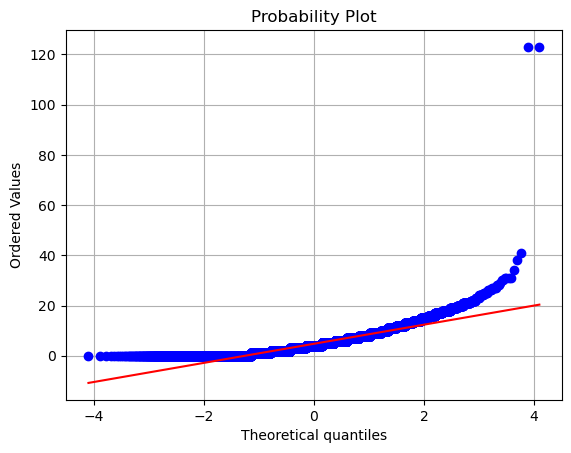

In [19]:
stats.probplot(df['person_emp_length'],dist='norm',plot=plt)
plt.grid()

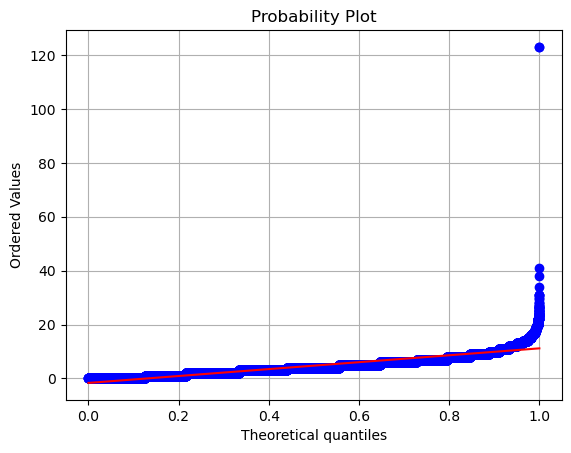

In [20]:
stats.probplot(df['person_emp_length'],dist='uniform',plot=plt)
plt.grid()

* The values are negitive

In [46]:
cln_data=df[df['person_emp_length']<=120.0]

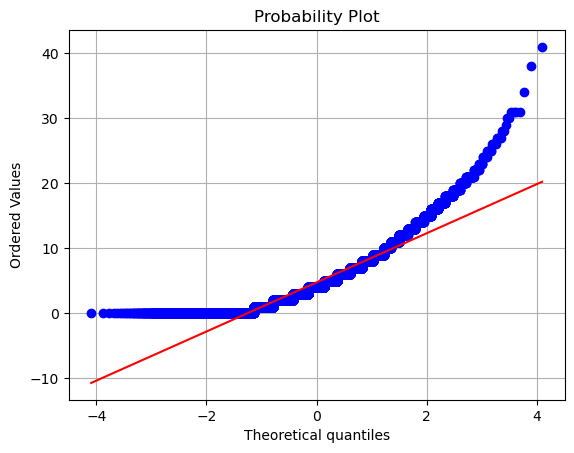

In [48]:
stats.probplot(cln_data['person_emp_length'],dist='norm',plot=plt)
plt.grid()

#### Non_viz on loan_amnt
* min,max,mean,median,std

In [24]:
print(df['loan_amnt'].min())
print(df['loan_amnt'].max())
print(df['loan_amnt'].mean())
print(df['loan_amnt'].median())
print(df['loan_amnt'].std())

500
35000
9589.371105859243
8000.0
6322.086645792174


* The mean and median are far maybe there are few are no outliers inthis loan_amnt column

#### Viz on loan_amnt

<AxesSubplot:>

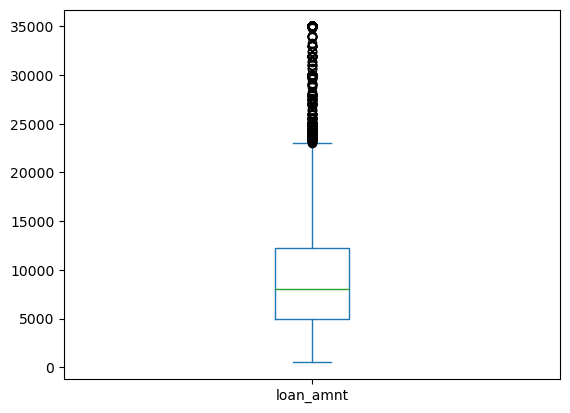

In [25]:
df['loan_amnt'].plot(kind='box')

* The are few outliers in this column

<AxesSubplot:ylabel='Density'>

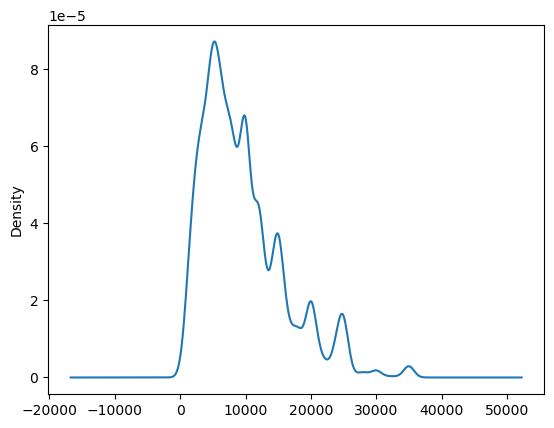

In [26]:
df['loan_amnt'].plot(kind='kde')

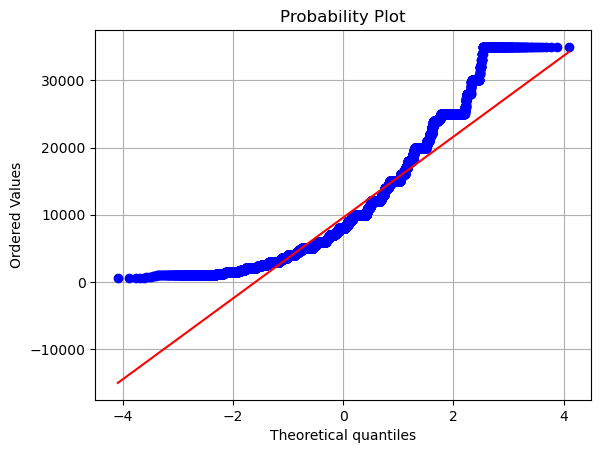

In [27]:
stats.probplot(df['loan_amnt'],dist='norm',plot=plt)
plt.grid()

In [29]:
# Applying boxcox
x_y,l=stats.boxcox(df['loan_amnt'])
print(l)

0.2363588392285395


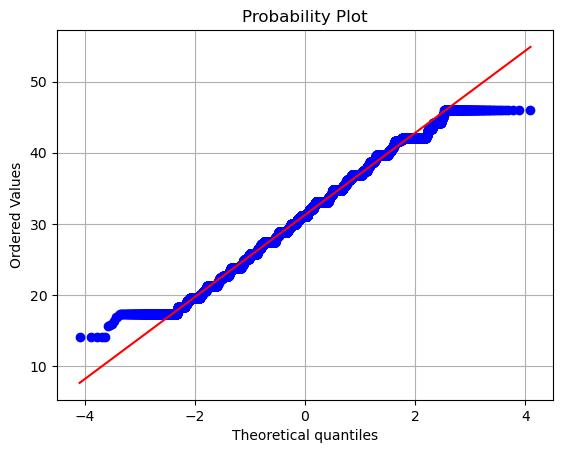

In [31]:
stats.probplot(x_y,dist='norm',plot=plt)
plt.grid()

* The most of the data points are lied on the line 
* It may be normal distribution

#### Non_viz on loan_int_rate
* min,max,mean,median,std

In [33]:
print(df['loan_int_rate'].min())
print(df['loan_int_rate'].max())
print(df['loan_int_rate'].mean())
print(df['loan_int_rate'].median())
print(df['loan_int_rate'].std())

5.42
23.22
11.009620023939183
10.99
3.0816111515930578


* The mean and median are different maybe there are few or no outliers in this loan_int_rate column

#### Viz on loan_int_rate

<AxesSubplot:>

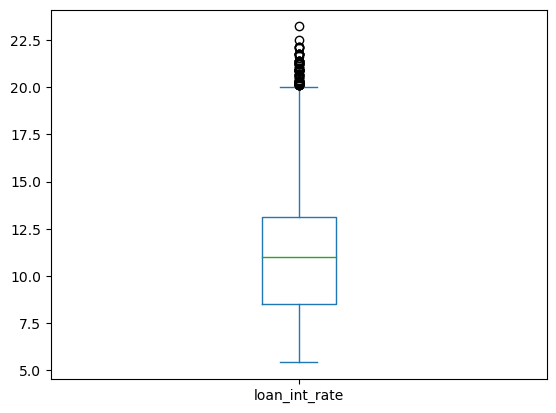

In [34]:
df['loan_int_rate'].plot( kind='box')

* There are few outliers in this column

<AxesSubplot:ylabel='Density'>

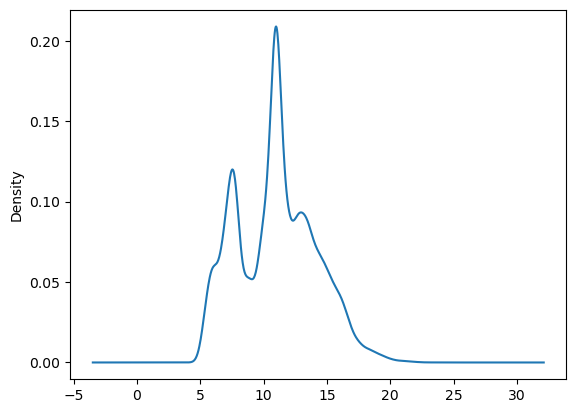

In [35]:
df['loan_int_rate'].plot(kind='kde')

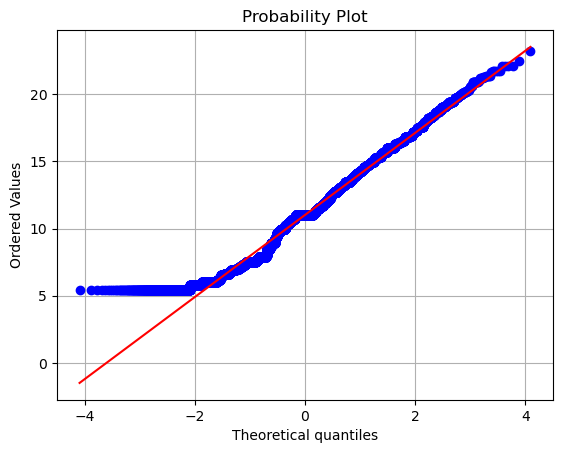

In [36]:
stats.probplot(df['loan_int_rate'],dist='norm',plot=plt)
plt.grid()

* The most of the data is lied on the line
* Maybe it is in normal distribution

#### Non_viz on loan_status
* min,max,mean,median,std

In [41]:
print(df['loan_status'].min())
print(df['loan_status'].max())
print(df['loan_status'].mean())
print(df['loan_status'].median())
print(df['loan_status'].std())

0
1
0.21816396059052823
0.0
0.4130056685601785


* The mean and median are near maybe there are few or no outliers in this column

#### Viz on loan_status

<AxesSubplot:>

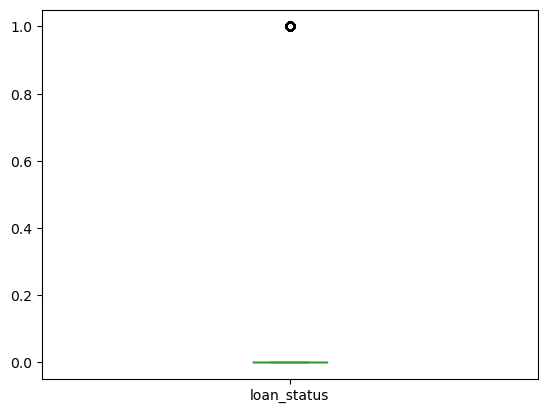

In [42]:
df['loan_status'].plot(kind='box')

* There are few outliere in this column which far away from the mean

<AxesSubplot:ylabel='Density'>

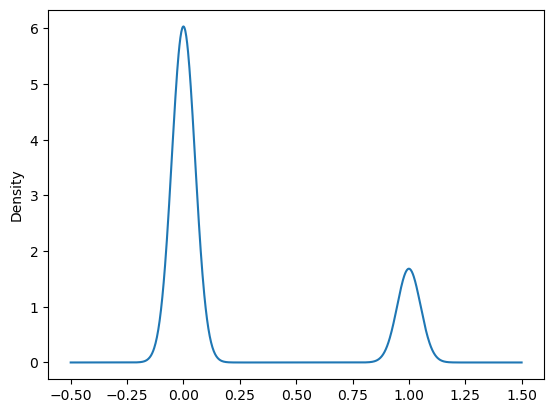

In [43]:
df['loan_status'].plot(kind='kde')

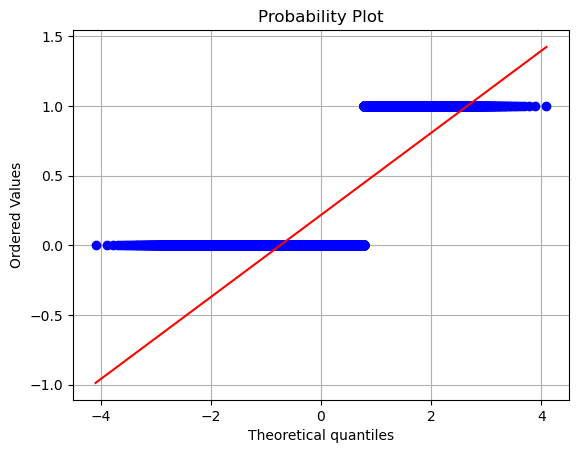

In [44]:
stats.probplot(df['loan_status'],dist='norm',plot=plt)
plt.grid()

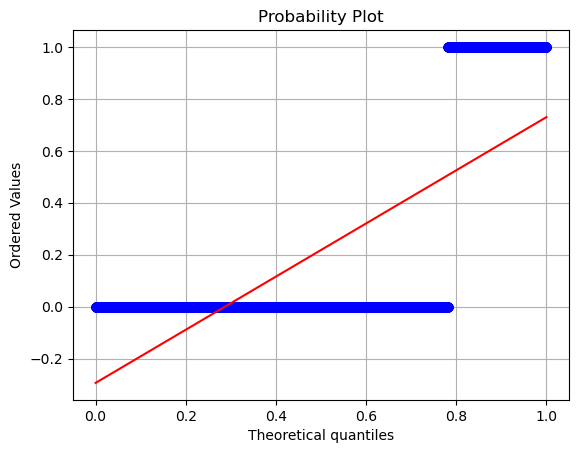

In [47]:
stats.probplot(df['loan_status'],dist='uniform',plot=plt)
plt.grid()

* The above column has -ve values

In [23]:
cln_data=df[df['loan_status']<1]

<AxesSubplot:>

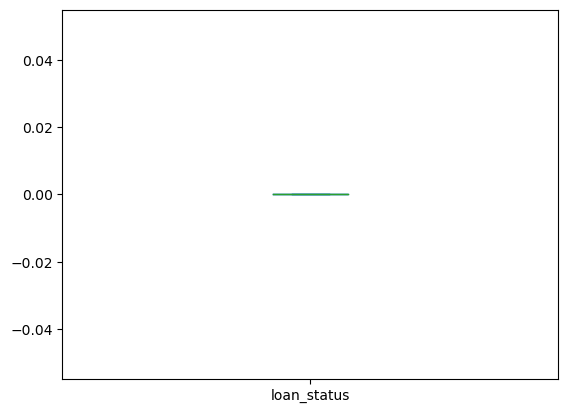

In [24]:
cln_data['loan_status'].plot(kind='box')

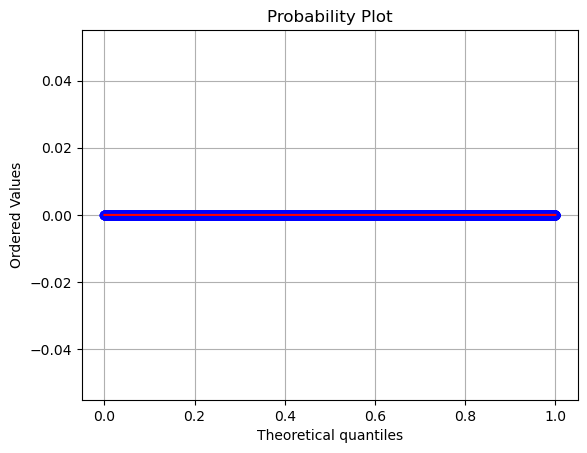

In [25]:
stats.probplot(cln_data['loan_status'],dist='uniform',plot=plt)
plt.grid()

#### Non_viz on loan_percent_income
* min,max,mean,median,std

In [48]:
print(df['loan_percent_income'].min())
print(df['loan_percent_income'].max())
print(df['loan_percent_income'].mean())
print(df['loan_percent_income'].median())
print(df['loan_percent_income'].std())

0.0
0.83
0.17020349283325145
0.15
0.10678175634492885


* THe mean and median are near maybe there are few or no outliers

#### Viz on loan_percent_income

<AxesSubplot:>

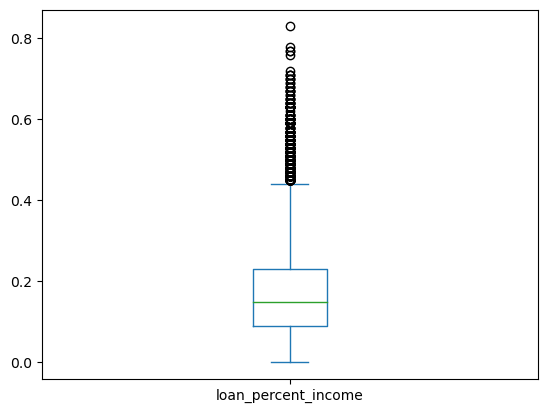

In [49]:
df['loan_percent_income'].plot(kind='box')

* There are few outliers in this column

<AxesSubplot:ylabel='Density'>

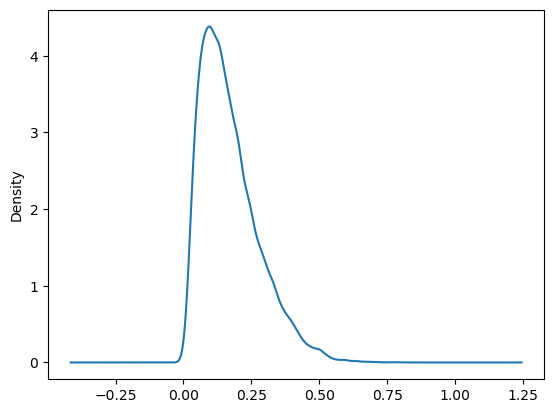

In [50]:
df['loan_percent_income'].plot(kind='kde')

* The plot look like bell shape but right skew

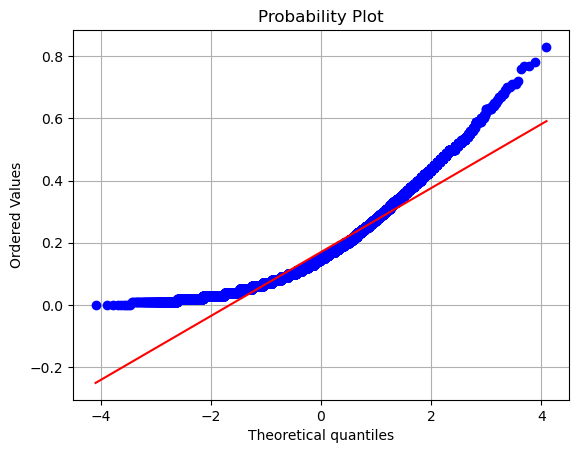

In [51]:
stats.probplot(df['loan_percent_income'],dist='norm',plot=plt)
plt.grid()

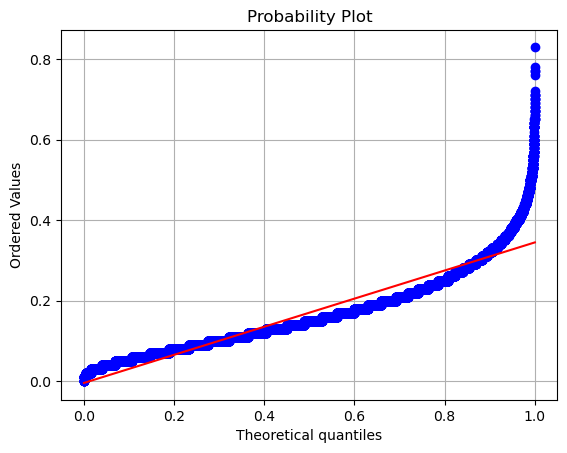

In [52]:
stats.probplot(df['loan_percent_income'],dist='uniform',plot=plt)
plt.grid()

* The above column has -ve values

In [26]:
# Removing outliers with condition
cln_data=df[df['loan_percent_income']<0.45]

<AxesSubplot:>

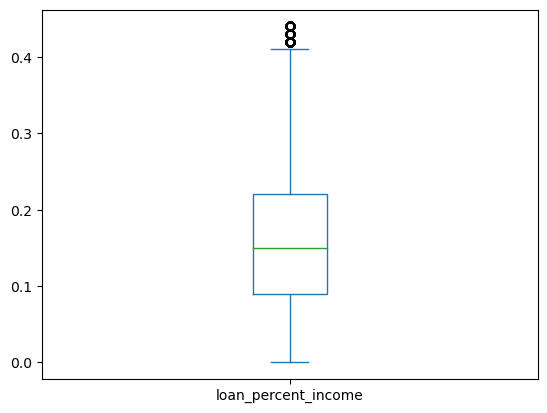

In [27]:
cln_data['loan_percent_income'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

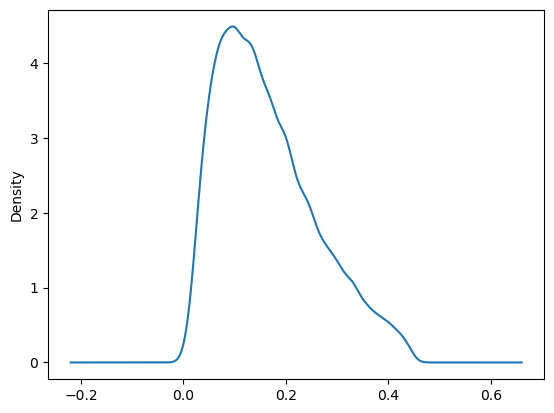

In [28]:
cln_data['loan_percent_income'].plot(kind='kde')

* The above plot look like bellshape

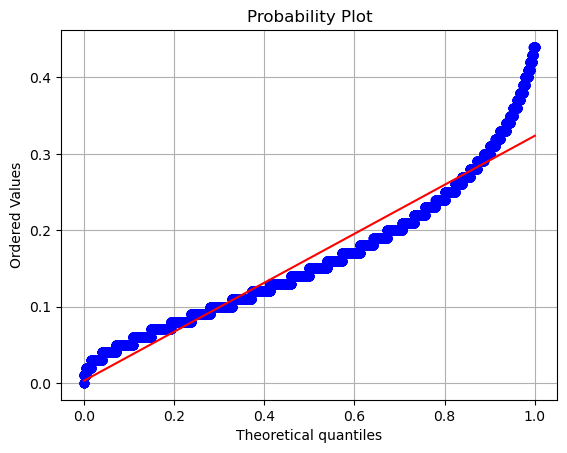

In [30]:
stats.probplot(cln_data['loan_percent_income'],dist='uniform',plot=plt)
plt.grid()

* The most of the data points are lied on the line
* It may be a uniform distribution

#### Non_viz on cb_person_cred_hist_length
* min,max,mean,median,std

In [54]:
print(df['cb_person_cred_hist_length'].min())
print(df['cb_person_cred_hist_length'].max())
print(df['cb_person_cred_hist_length'].mean())
print(df['cb_person_cred_hist_length'].median())
print(df['cb_person_cred_hist_length'].std())

2
30
5.804211043246064
4.0
4.0550011647128406


* The mean and median are not same maybe there are few or no outliers

#### viz on cb_person_cred_hist_length

<AxesSubplot:>

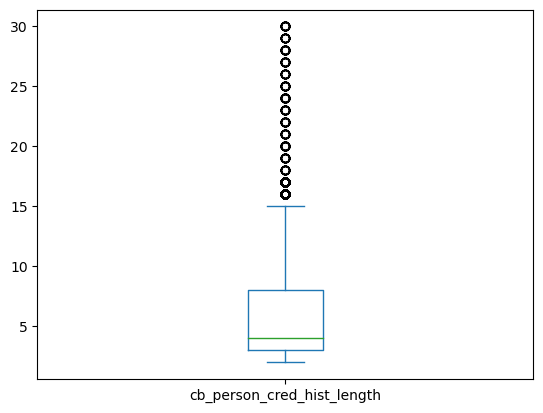

In [55]:
df['cb_person_cred_hist_length'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

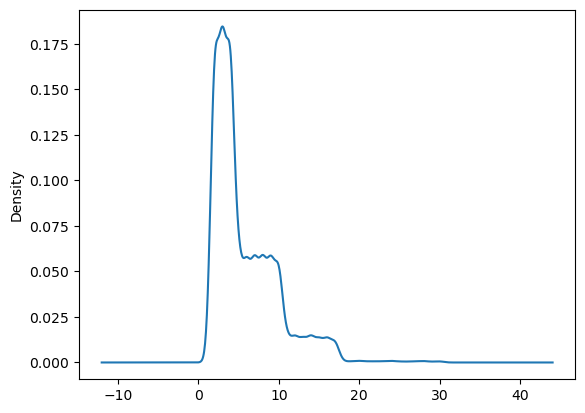

In [56]:
df['cb_person_cred_hist_length'].plot(kind='kde')

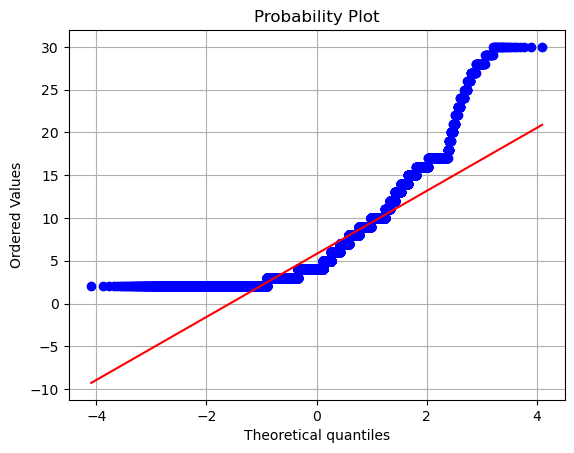

In [57]:
stats.probplot(df['cb_person_cred_hist_length'],dist='norm',plot=plt)
plt.grid()

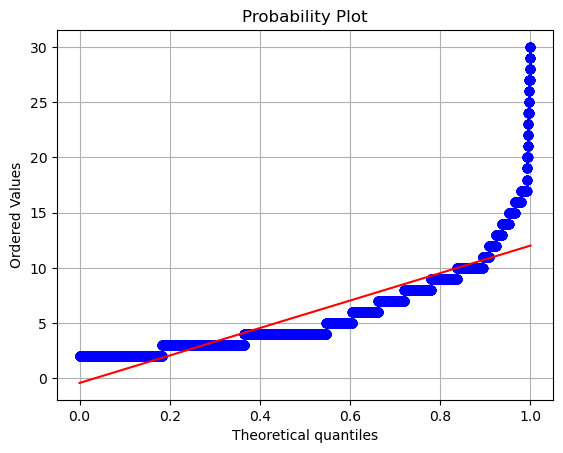

In [58]:
stats.probplot(df['cb_person_cred_hist_length'],dist='uniform',plot=plt)
plt.grid()

# Bivariate Analysis

### Num Vs NUM

#### Between person_age and loan_status

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

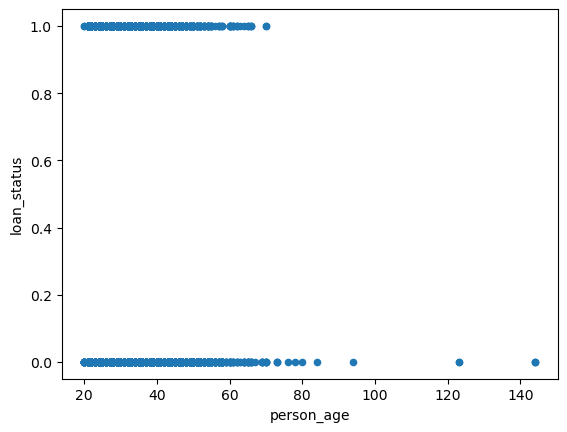

In [12]:
df.plot(x='person_age',y='loan_status',kind='scatter')

* There is no relation between loan_status and person_age

#### Between person_income and loan_status

<AxesSubplot:xlabel='person_income', ylabel='loan_status'>

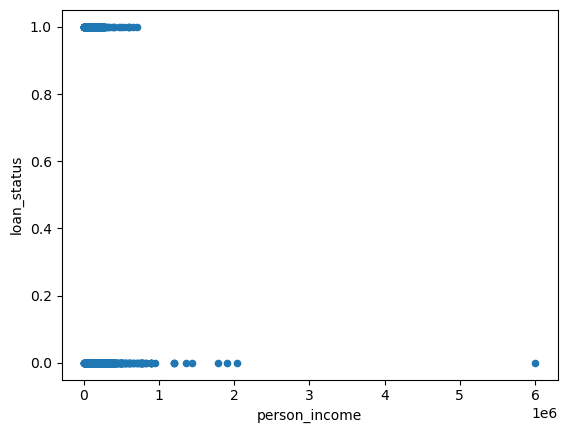

In [14]:
df.plot(x='person_income',y='loan_status',kind='scatter')

* There is no relation between loan_status and person_income

#### Between person_emp_length and loan_status

<AxesSubplot:xlabel='person_emp_length', ylabel='loan_status'>

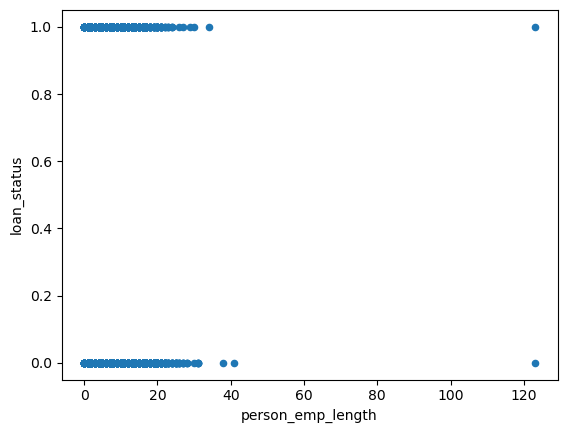

In [15]:
df.plot(x='person_emp_length',y='loan_status',kind='scatter')

* There is no relation between person_emp_length and loan_status

#### Between loan_amnt and loan_status

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

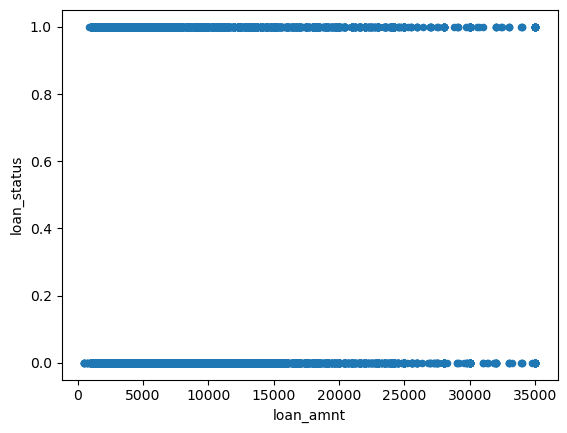

In [16]:
df.plot(x='loan_amnt',y='loan_status',kind='scatter')

* There is no relation betweem loan_amnt and loan_status

#### Between loan_int_rate and loan_status

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_status'>

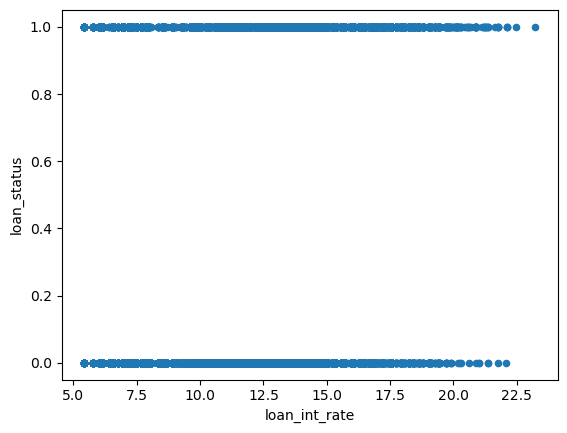

In [17]:
df.plot(x='loan_int_rate',y='loan_status',kind='scatter')

* there is no relation between loan_int_rate and loan_status

#### Between loan_percent_income and loan_status

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_status'>

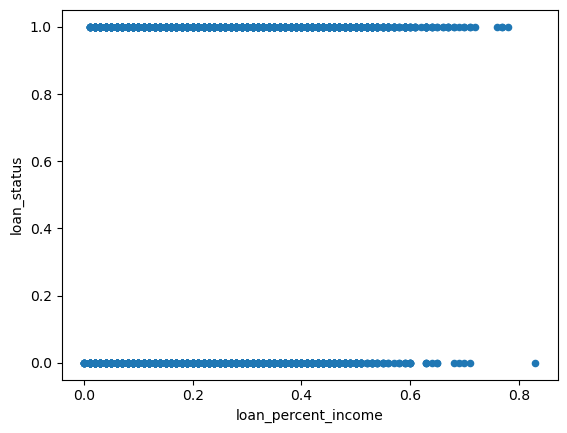

In [18]:
df.plot(x='loan_percent_income',y='loan_status',kind='scatter')

* There is no relation between loan_percent_income and loan_status

#### Between cb_person_cred_hist_length and loan_status

<AxesSubplot:xlabel='cb_person_cred_hist_length', ylabel='loan_status'>

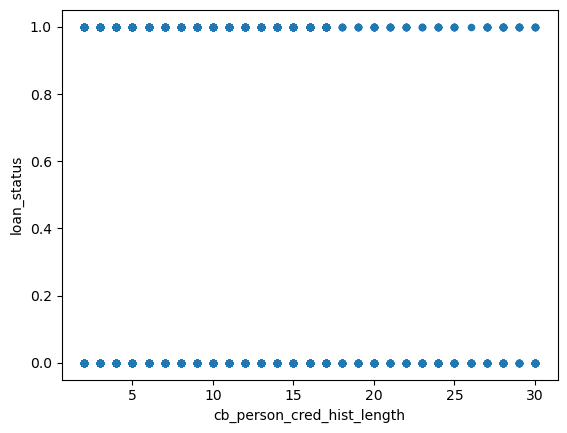

In [19]:
df.plot(x='cb_person_cred_hist_length',y='loan_status',kind='scatter')

* There is no relation between both the columns

### NUm vs Cato

#### Between person_home_ownership and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='person_home_ownership'>

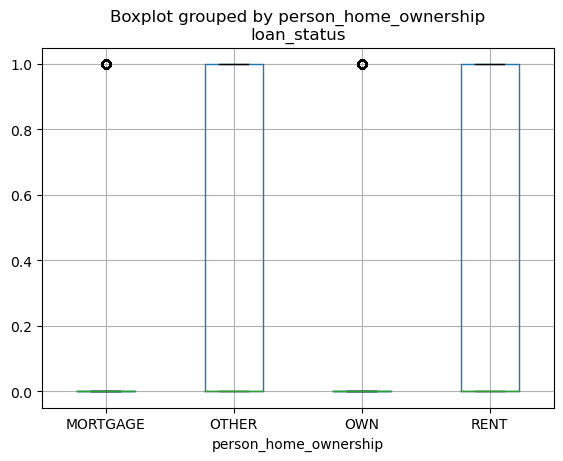

In [21]:
df.boxplot(by='person_home_ownership',column='loan_status')

* The means of mortgage,others,own,rent are same
* The rent and other of person_home_ownership are more than mortgage and own persons
* The rent and other people are applying more than others

#### Between loan_intent and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='loan_intent'>

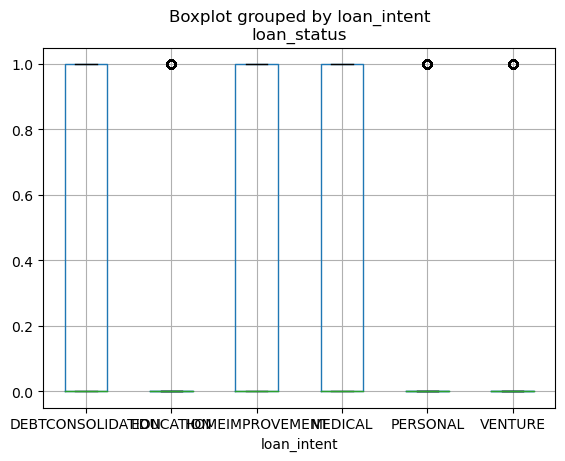

In [22]:
df.boxplot(by='loan_intent',column='loan_status')

* The mean of loan_intent is same
* THe most of the people applying loan on Debtconsolidation,Homeimprovement,Medical

#### Between loan_grade and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='loan_grade'>

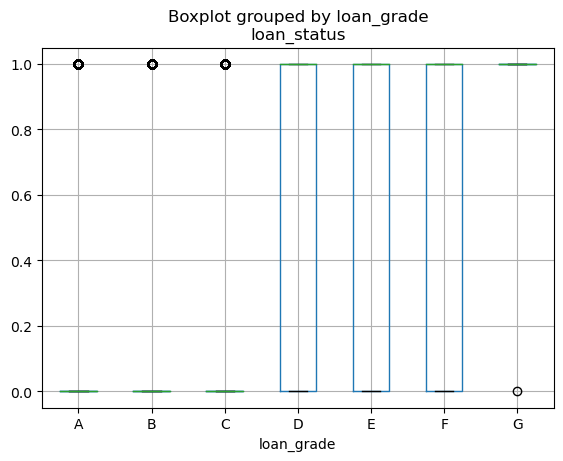

In [25]:
df.boxplot(by='loan_grade',column='loan_status')

* The majority of the people are in the grade of D,E,F 
* So the people are not paying loans in given time

#### Between cb_person_default_on_file and loan_status

<AxesSubplot:title={'center':'loan_status'}, xlabel='cb_person_default_on_file'>

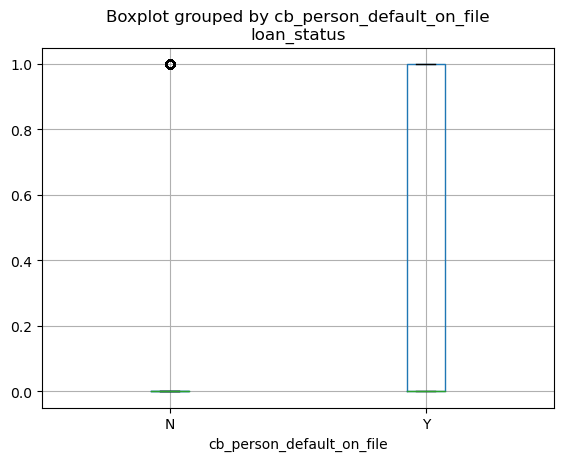

In [26]:
df.boxplot(by='cb_person_default_on_file',column='loan_status')

* The above boxplot shows that the most of the people has default on file

# Conclusion:

* The rent and other people are applying more loan application  than others
* THe most of the people applying loan on Debtconsolidation,Homeimprovement,Medical

* The majority of the people are in the grade of D,E,F 
* So the people are not paying loans in given time
* The majority of the people has the defalt on files

# Recommendations:

* Check the previous status if the person is good in paying the loan in time approve it.
* The income less than the payment reject that person application
* Check the creadit score to estimate the loan amount 

In [29]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [133]:
def outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lb=Q1-(1.5*IQR)
    Ub=Q3+(1.5*IQR)
    df=df[(df[col]>Lb)&(df[col]<Ub)]
    return df

In [134]:
df=outliers(df,'person_age')
df.shape

(30344, 12)

In [135]:
df=outliers(df,'person_income')
df.shape

(29212, 12)

In [136]:
df=outliers(df,'person_emp_length')
df.shape

(28630, 12)

In [137]:
df=outliers(df,'loan_amnt')
df.shape

(27529, 12)

In [138]:
df=outliers(df,'loan_int_rate')
df.shape

(27497, 12)

In [139]:
df=outliers(df,'loan_percent_income')
df.shape

(26796, 12)

In [140]:
df=outliers(df,'cb_person_cred_hist_length')
df.shape

(25726, 12)

In [141]:
df.shape

(25726, 12)

In [109]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2


In [58]:
df['loan_grade'].unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [59]:
import seaborn as sns

In [142]:
# step-1
y=df['loan_status']
X=df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]

In [143]:
# step-2.1
# spliting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [144]:
# step-2.2   [spliting data into X_train num]
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17397,22,38000,5.0,10000,13.49,0.26,2
22236,29,54000,2.0,2500,13.49,0.05,9
22587,33,69000,8.0,7400,9.76,0.11,5
21934,29,50400,4.0,9000,10.37,0.18,9
2908,25,77500,3.0,3000,6.54,0.04,4


In [145]:
# step-2.3   [spliting data into X_train_categorical]
X_train_obj=X_train.select_dtypes(include=['object'])
X_train_obj.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17397,RENT,EDUCATION,C,Y
22236,MORTGAGE,EDUCATION,C,Y
22587,RENT,HOMEIMPROVEMENT,B,N
21934,OWN,EDUCATION,B,N
2908,RENT,HOMEIMPROVEMENT,A,N


In [146]:
# step-2.4   [spliting X_train_cate_normal]
X_train_obj_normal=X_train_obj[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_obj_normal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
17397,RENT,EDUCATION,Y
22236,MORTGAGE,EDUCATION,Y
22587,RENT,HOMEIMPROVEMENT,N
21934,OWN,EDUCATION,N
2908,RENT,HOMEIMPROVEMENT,N


In [147]:
# step-2.5   [spliting X_train_cate_ordinal]
X_train_obj_order=X_train_obj[['loan_grade']]
X_train_obj_order.head()

,loan_grade
17397,C
22236,C
22587,B
21934,B
2908,A


In [148]:
# step-2.6    [spliting data into X_test_num]
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5066,23,42000,0.0,5000,10.99,0.12,2
19074,27,24000,1.0,2150,14.72,0.09,7
4096,26,131000,10.0,4000,12.84,0.03,3
25889,29,35000,0.0,10000,12.87,0.29,8
644,23,57000,3.0,20000,16.89,0.35,2


In [149]:
# step-2.7    [spliting data into X_test_cate]
X_test_obj=X_test.select_dtypes(include=['object'])
X_test_obj.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
5066,RENT,DEBTCONSOLIDATION,C,Y
19074,RENT,MEDICAL,C,N
4096,RENT,HOMEIMPROVEMENT,C,Y
25889,OWN,VENTURE,C,Y
644,RENT,EDUCATION,D,N


In [150]:
# step-2.8    [spliting test data into X_test_cate_ohe]
X_test_obj_normal=X_test_obj[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_obj_normal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
5066,RENT,DEBTCONSOLIDATION,Y
19074,RENT,MEDICAL,N
4096,RENT,HOMEIMPROVEMENT,Y
25889,OWN,VENTURE,Y
644,RENT,EDUCATION,N


In [151]:
# step-2.9    [spliting test data into X_test_cate_le]
X_test_obj_order=X_test_obj[['loan_grade']]
X_test_obj_order.head()

,loan_grade
5066,C
19074,C
4096,C
25889,C
644,D


In [152]:
# step-3.1
# Data preprocessing on num columns using 'Standardscaler'
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_rescaler=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_train_num_rescaler.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17397,-1.063308,-0.738805,0.196654,0.351001,0.845880,1.114660,-1.054672
22236,0.751004,-0.124593,-0.707525,-1.206960,0.845880,-1.226721,1.607693
22587,1.787754,0.451231,1.100832,-0.189092,-0.382253,-0.557755,0.086342
21934,0.751004,-0.262791,-0.104739,0.143273,-0.181406,0.222706,1.607693
2908,-0.285746,0.777531,-0.406132,-1.103096,-1.442465,-1.338215,-0.293996


In [153]:
# step-3.2   [applying ohe ]
from sklearn.preprocessing import OneHotEncoder
coder=OneHotEncoder(drop='first',sparse=False)
X_train_obj_normal_ohe=pd.DataFrame(coder.fit_transform(X_train_obj_normal),columns=coder.get_feature_names_out(X_train_obj_normal.columns),index=X_train_obj_normal.index)
                                    
X_train_obj_normal_ohe.head()                                

C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
17397,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
22236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
22587,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21934,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2908,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [154]:
# step-3.3   [applying le ]
X_train_obj_order_le=pd.DataFrame(index=X_train_obj_order.index)
X_train_obj_order_le.head()

""
17397
22236
22587
21934
2908


In [155]:
# step-3.4  
lg={'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}
X_train_obj_order_le['loan_grade']=X_train_obj_order['loan_grade'].apply(lambda x:lg[x])
X_train_obj_order_le.head()

,loan_grade
17397,5
22236,5
22587,6
21934,6
2908,7


In [156]:
# step-3.5   [transforming train data]
X_train_transform=pd.concat([X_train_num_rescaler,X_train_obj_normal_ohe,X_train_obj_order_le],axis=1)
X_train_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
17397,-1.063308,-0.738805,0.196654,0.351001,0.845880,1.114660,-1.054672,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5
22236,0.751004,-0.124593,-0.707525,-1.206960,0.845880,-1.226721,1.607693,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5
22587,1.787754,0.451231,1.100832,-0.189092,-0.382253,-0.557755,0.086342,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6
21934,0.751004,-0.262791,-0.104739,0.143273,-0.181406,0.222706,1.607693,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
2908,-0.285746,0.777531,-0.406132,-1.103096,-1.442465,-1.338215,-0.293996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7


In [165]:
# step-4 [bulding model]
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_transform,y_train)

LogisticRegression()

In [166]:
# step-5.1   [data preprocessing on test data numeric columns]
X_test_num_rescaler=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_test_num_rescaler.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5066,-0.804121,-0.585252,-1.310311,-0.687640,0.022734,-0.446261,-1.054672
19074,0.232629,-1.276240,-1.008918,-1.279665,1.250868,-0.780744,0.847018
4096,-0.026558,2.831302,1.703618,-0.895368,0.631862,-1.449710,-0.674334
25889,0.751004,-0.853970,-1.310311,0.351001,0.641740,1.449143,1.227355
644,-0.804121,-0.009428,-0.406132,2.428283,1.965358,2.118109,-1.054672


In [167]:
# step-5.2    [preprocesing on test normal]
X_test_obj_normal_one=pd.DataFrame(coder.transform(X_test_obj_normal),columns=coder.get_feature_names_out(X_test_obj_normal.columns),index=X_test_obj_normal.index)
X_test_obj_normal_one.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
5066,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19074,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4096,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
644,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# step-5.3 [preproceing on test order]
X_test_obj_order_le=pd.DataFrame(index=X_test_obj_order.index)
X_test_obj_order_le.head()

""
5066
19074
4096
25889
644


In [169]:
# step-5.4
X_test_obj_order_le['loan_grade']=X_test_obj_order['loan_grade'].apply(lambda x:lg[x])
X_test_obj_order_le.head()

,loan_grade
5066,5
19074,5
4096,5
25889,5
644,4


In [170]:
# step-5.5 [X_test_transform by concating]
X_test_transform=pd.concat([X_test_num_rescaler,X_test_obj_normal_one,X_test_obj_order_le],axis=1)
X_test_transform.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
5066,-0.804121,-0.585252,-1.310311,-0.687640,0.022734,-0.446261,-1.054672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
19074,0.232629,-1.276240,-1.008918,-1.279665,1.250868,-0.780744,0.847018,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5
4096,-0.026558,2.831302,1.703618,-0.895368,0.631862,-1.449710,-0.674334,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5
25889,0.751004,-0.853970,-1.310311,0.351001,0.641740,1.449143,1.227355,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5
644,-0.804121,-0.009428,-0.406132,2.428283,1.965358,2.118109,-1.054672,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4


In [173]:
# step-6  [prediction]
y_test_predict=reg.predict(X_test_transform)

In [176]:
# syep-7  [evaluation]
from sklearn.metrics import accuracy_score,classification_report
print('accu_score:',metrics.accuracy_score(y_test,y_test_predict))
print('class_report:',metrics.classification_report(y_test,y_test_predict))

accu_score: 0.8572761194029851
class_report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5142
           1       0.72      0.47      0.57      1290

    accuracy                           0.86      6432
   macro avg       0.80      0.71      0.74      6432
weighted avg       0.85      0.86      0.85      6432



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

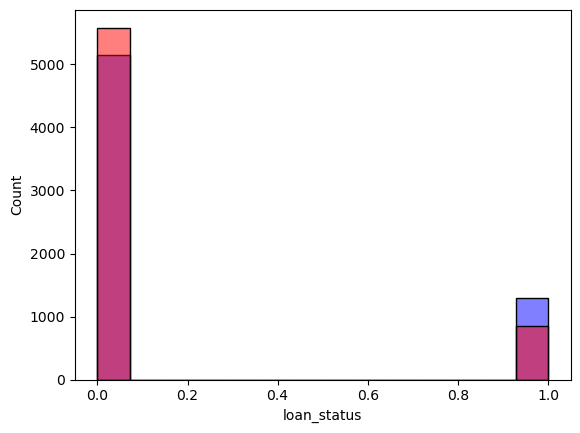

In [177]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# DT

In [181]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
reg.fit(X_train_transform,y_train)

y_test_predict=reg.predict(X_test_transform)

from sklearn import metrics
print('accu_score :',metrics.accuracy_score(y_test,y_test_predict))
print('class_report :',metrics.classification_report(y_test,y_test_predict))

accu_score : 0.8821517412935324
class_report :               precision    recall  f1-score   support

           0       0.94      0.92      0.93      5142
           1       0.69      0.75      0.72      1290

    accuracy                           0.88      6432
   macro avg       0.81      0.83      0.82      6432
weighted avg       0.89      0.88      0.88      6432



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

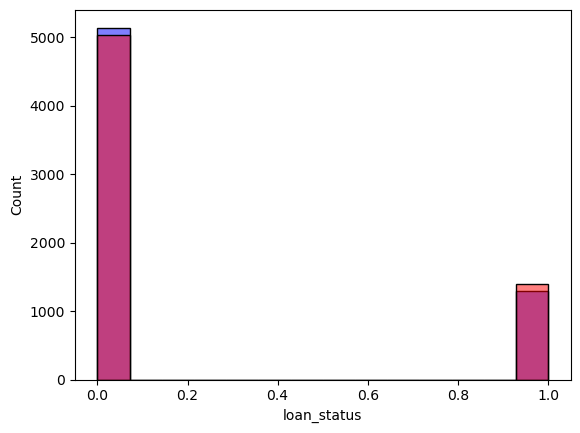

In [182]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier()
reg.fit(X_train_transform,y_train)

y_test_predict=reg.predict(X_test_transform)

from sklearn import metrics
print('accu_score :',metrics.accuracy_score(y_test,y_test_predict))
print('class_report :',metrics.classification_report(y_test,y_test_predict))

accu_score : 0.8877487562189055
class_report :               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5142
           1       0.80      0.59      0.68      1290

    accuracy                           0.89      6432
   macro avg       0.85      0.78      0.80      6432
weighted avg       0.88      0.89      0.88      6432



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

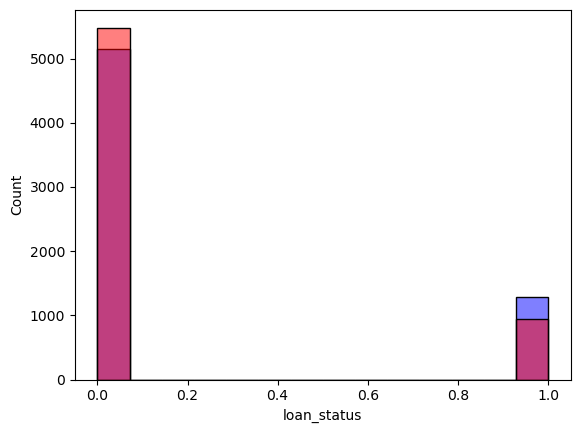

In [184]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)

# RF

In [185]:
from sklearn.ensemble import RandomForestClassifier
reg=RandomForestClassifier()
reg.fit(X_train_transform,y_train)

y_test_predict=reg.predict(X_test_transform)

from sklearn import metrics
print('accu_score :',metrics.accuracy_score(y_test,y_test_predict))
print('class_report :',metrics.classification_report(y_test,y_test_predict))

accu_score : 0.9331467661691543
class_report :               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5142
           1       0.96      0.69      0.81      1290

    accuracy                           0.93      6432
   macro avg       0.95      0.84      0.88      6432
weighted avg       0.94      0.93      0.93      6432



<AxesSubplot:xlabel='loan_status', ylabel='Count'>

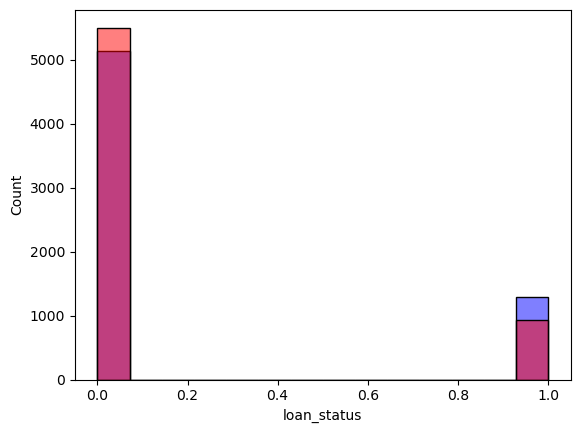

In [186]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_predict,color='red',alpha=0.5)